In [1]:
%pylab inline
from h5py import File
from numpy import loadtxt

Populating the interactive namespace from numpy and matplotlib


In [2]:
class FancyFormatter(Formatter):
    """Formater for values with LaTeX fonts."""

    def __call__(self, v, pos=None):
        return r'${:.5G}$'.format(v)

    def format_data_short(self, value):
        return '{:.1f}'.format(value)

## BFV files for LCDM, BA and CLP parametrizations

In [3]:
BFVpath = './../Output/BFV/'

baoBFVlcdm = BFVpath+'BAO/BAO-LCDM-20171204-124557.txt'
baoBFVcpl= BFVpath+'BAO/BAO-CPL-20171205-163029.txt'
baoBFVba = BFVpath+'BAO/BAO-BA-20171205-235931.txt'

unionBFVlcdm = BFVpath+'SNe/SNe_Union21-LCDM-20171204-124739.txt'
unionBFVcpl = BFVpath+'SNe/SNe_Union21-CPL-20171206-004449.txt'
unionBFVba = BFVpath+'SNe/SNe-Union-BA-20171206-000534.txt'

jlaBFVlcdm = BFVpath+'SNe/SNe_JLA-LCDM-20171204-124905.txt'
jlaBFVcpl = BFVpath+'SNe/SNe_JLA-CPL-20171206-004204.txt'
jlaBFVba = BFVpath+'SNe_JLA-BA-20171206-000805.txt'

hzBFVlcdm = BFVpath+'Hz/Hz_LCDM-20171204-130334.txt'
hzBFVcpl = BFVpath+'Hz/Hz-CPL-20171206-004007.txt'
hzBFVba = BFVpath+'Hz/Hz-BA-20171206-003856.txt'

### LCDM BFV

In [4]:
wz0, chi2bL, chi2red, w0, w1, w2, w3, hbL, ommbL, bic, aic,m = np.loadtxt(baoBFVlcdm)
wz0, chi2jlaL, chi2red, w0, w1, w2, w3, hjlaL, ommjlaL, bic, aic,m = np.loadtxt(jlaBFVlcdm)
wz0, chi2unionL, chi2red, w0, w1, w2, w3, hunionL, ommunionL, bic, aic,m = np.loadtxt(unionBFVlcdm)
wz0, chi2ccL, chi2red, w0, w1, w2, w3, hccL, ommccL, bic, aic,m = np.loadtxt(hzBFVlcdm)


## Grids h5  files

In [5]:
GRIDSpath = './../Output/grids/' 

gridBAOlcdm = GRIDSpath +'BAO/h-OmM_LCMD-BAO-grid-20180116-124135.h5'
gridCClcdm = GRIDSpath + 'Hz/h-OmM_LCDM-grid-20171206-182311.h5'
gridJLAlcmd = GRIDSpath + 'SNe/h-OmM_LCDM-JLA-grid-20171206-183442.h5'
#gridUNIONlcdm = GRIDSpath+'SNe/h-OmM_LCDM-Union21-grid-20171208-181926.h5'
gridUNIONlcdm = GRIDSpath+'SNe/h-OmM_LCDM-Union21-test-grid-20171211-171324.h5'

gridCCcpl = GRIDSpath + 'Hz/h-OmM_CPL-grid-20171206-010255.h5'
gridBAOcpl = GRIDSpath +'BAO/h-OmM_CPL-grid-20171206-010216.h5'


In [6]:
ds1_2,ds2_2,ds3_2=2.29575, 6.18007, 11.8292 #2 parameters

ds1_4,ds2_4,ds3_4=4.71947, 9.71563, 16.2513 #4 parameters


In [7]:
dark_pink = '#800080'
light_pink = '#FFB3FF'

dark_blue = '#003366'
light_blue = '#99CCFF'

dark_orange = '#FF8000'
light_orange = '#FFBF80'

dark_green = '#208000'
light_green = '#C6FFB3'

dark_red = '#7D172E'
medium_red = '#A11D3B'
bright_red='#EC5766'
light_red = '#DEA6A6'


dark_purple = '#3E3168'
dark_violet='#561643'
medium_purple = '#54428E'#'#726DA8'
light_purple = '#8B87B7'#'#A5A2C7'#'#7D8CC4'

colors = [
        [dark_purple, dark_purple, medium_purple, light_purple],
        [dark_red, dark_red, medium_red, bright_red, light_red],
        ['darkblue', 'navy', 'mediumblue','cornflowerblue',
         'steelblue'],
        [dark_orange, light_orange],
        [dark_pink, light_pink],
        [dark_green, light_green]
    ]


purples = colors[0]
reds = colors[1]
blues = colors[2]
reds2 = ['firebrick', 'firebrick', dark_red, 'tomato']

In [8]:
figspath = './../../../../f_R-Chi2/code-chi2-bao-sneia-shared/figures/'

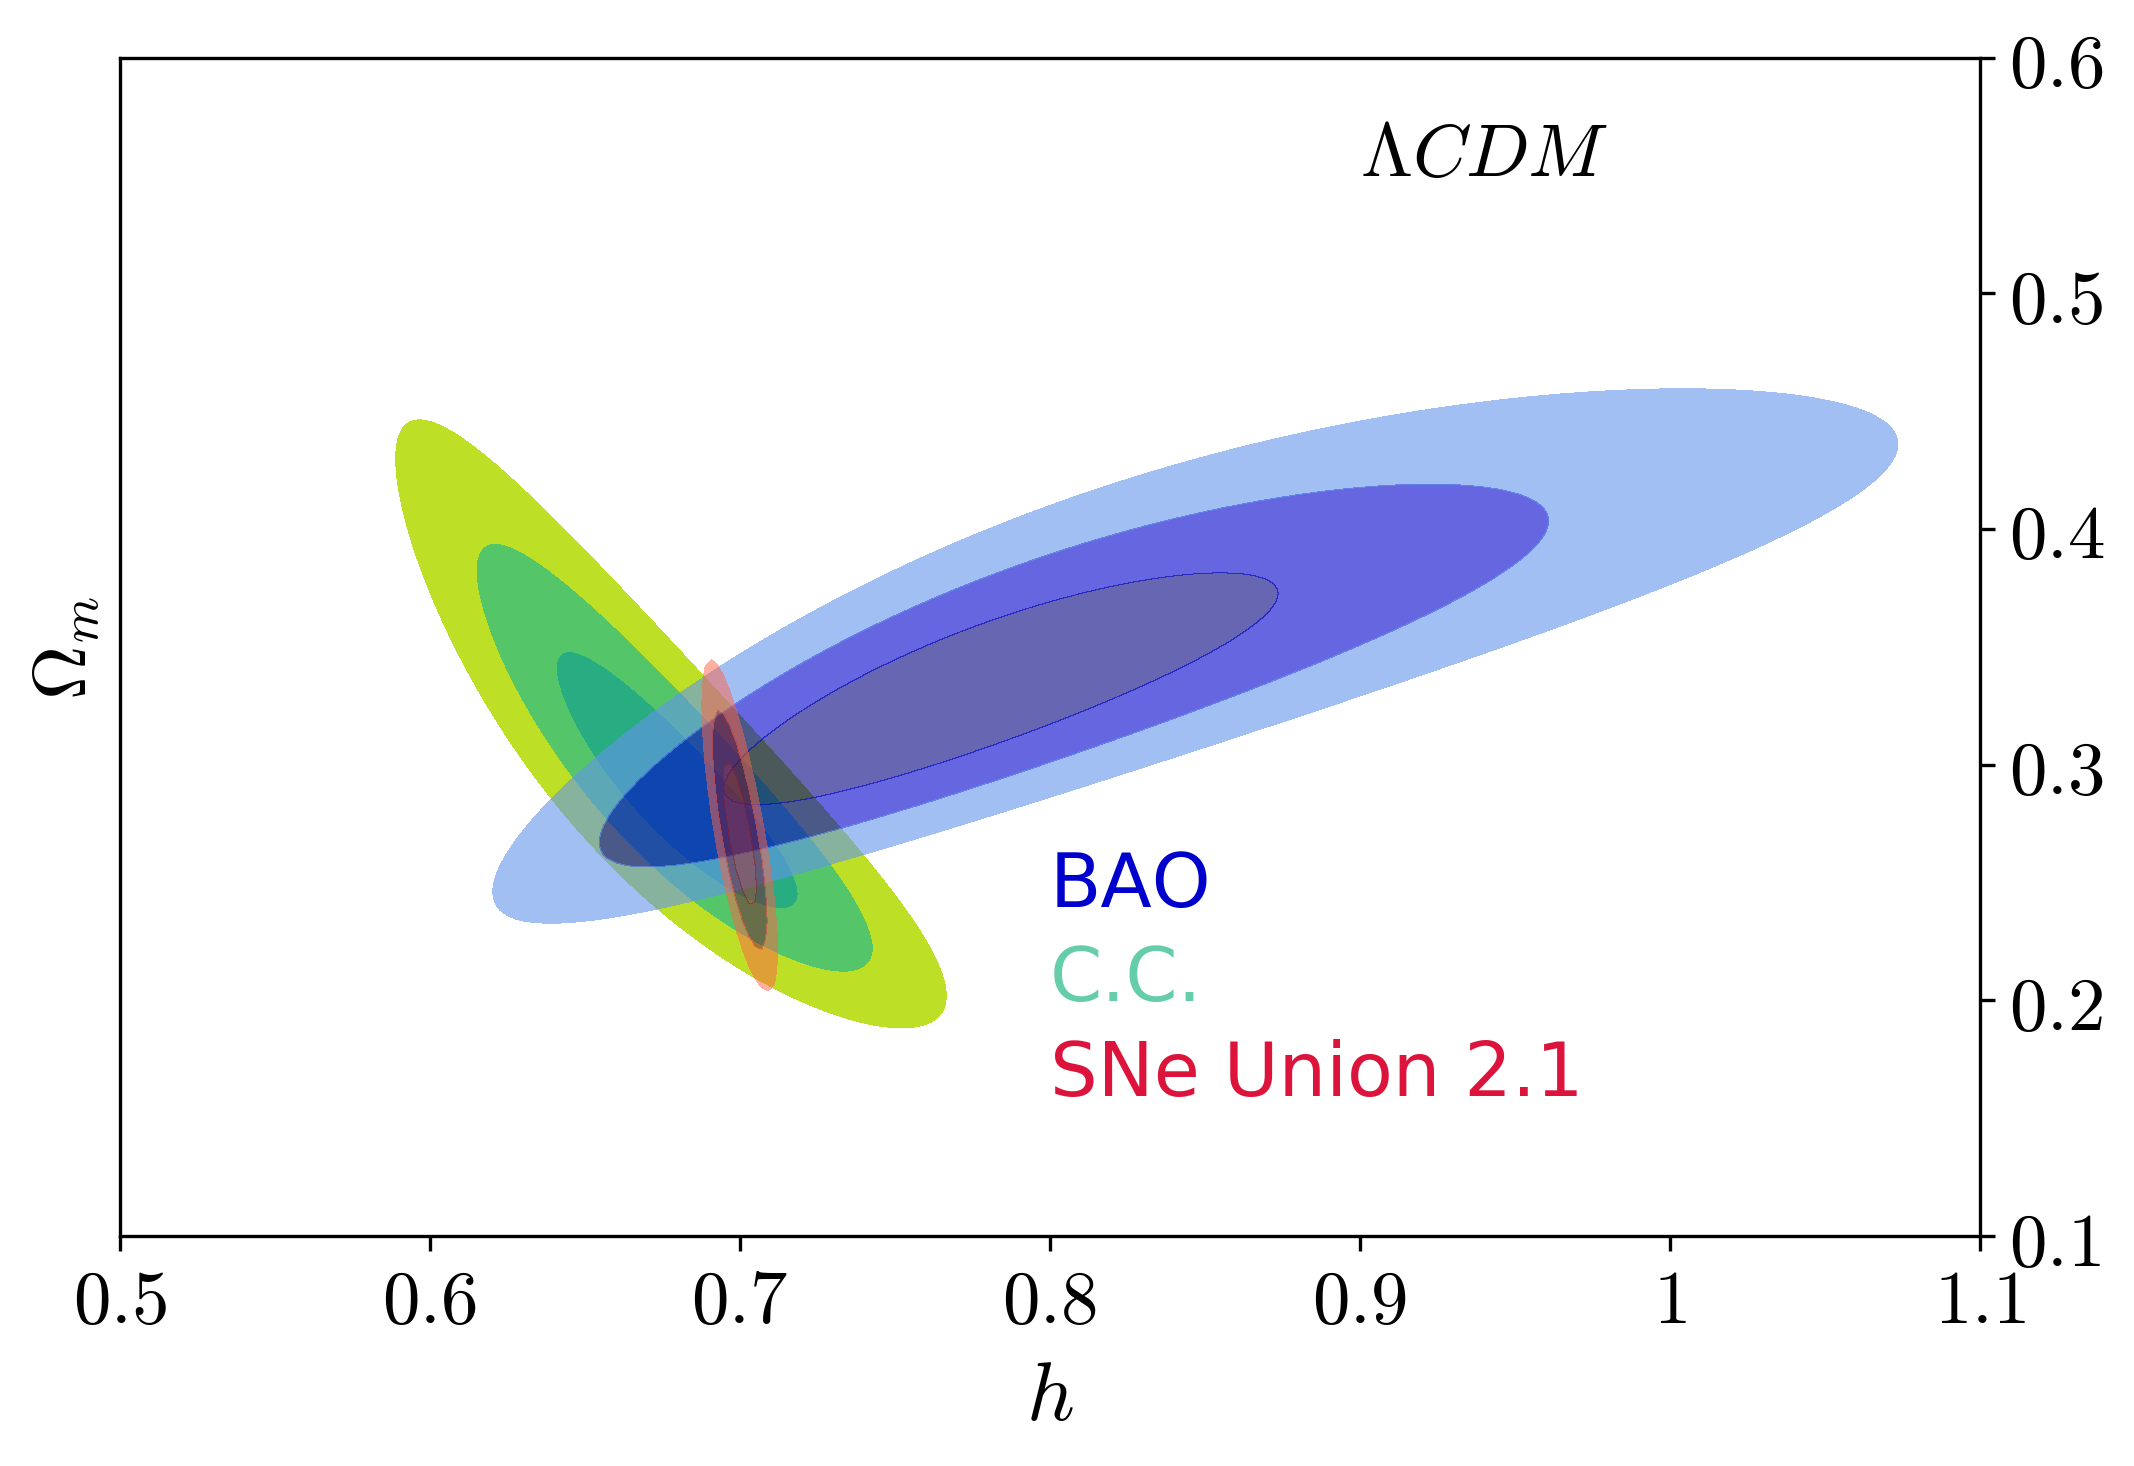

In [24]:
#LCDM
ds1, ds2, ds3 = ds1_2, ds2_2, ds3_2
with File(gridBAOlcdm, 'r') as datafile:
    datab = datafile['/DataGrid'].value
    chi2datab = datafile['/Chi2'].value 
    Hb = datab[:,:,4]
    OmMb = datab[:,:,5]
    Chi2b = chi2datab[:, :,0]
    #print(Chi2)

with File(gridUNIONlcdm, 'r') as datafile:
#with File(gridJLAlcmd, 'r') as datafile:
    datas = datafile['/DataGrid'].value
    chi2datas = datafile['/Chi2'].value
    Hs = datas[:,:,4]
    OmMs = datas[:,:,5]
    Chi2s = chi2datas[:, :,0]
    
with File(gridCClcdm, 'r') as datafile:
    datac = datafile['/DataGrid'].value
    chi2datac = datafile['/Chi2'].value  
    Hc = datac[:,:,4]
    OmMc = datac[:,:,5]
    Chi2c = chi2datac[:, :,0]


##################################    
# Size in inches, and dots per inch
figsize = (8, 8)
dpi = 300

rcParams['font.size'] = 18
rcParams['lines.linewidth'] = 2
rcParams['mathtext.fontset'] = 'cm'

figure(figsize=figsize, dpi=dpi)

grid_spec = GridSpec(2, 1, height_ratios=[2, 1])
subplots_adjust(hspace=0.05)

### upper panel
subplot(grid_spec[0])
cax = gca()

plt.contourf(Hc, OmMc, Chi2c, 
             levels =[0,chi2ccL, chi2ccL + ds1, chi2ccL + ds2, chi2ccL + ds3],
             alpha=1)

plt.contourf(Hb, OmMb, Chi2b, 
             levels =[0,chi2bL, chi2bL + ds1, chi2bL + ds2, chi2bL + ds3],
             alpha=0.6,
             #cmap=plt.cm.Blues
            colors = blues
            )


plt.contourf(Hs, OmMs, Chi2s, 
             levels =[0,chi2unionL, chi2unionL + ds1, chi2unionL + ds2, chi2unionL + ds3],
            
             #levels =[0,chi2jlaL, chi2jlaL + ds1, chi2jlaL + ds2, chi2jlaL + ds3],
             #cmap=plt.cm.autumn_r,
             colors = reds2,
            alpha =0.5)







text(0.9, 0.55, r'$\Lambda CDM$')
text(0.8, 0.24,'BAO', color='mediumblue')
text(0.8, 0.20,'C.C.', color='mediumaquamarine')
#text(0.8, 0.18,'SNe JLA binned', color='crimson')
text(0.8, 0.16,'SNe Union 2.1', color='crimson')

#xlim(0.58,1)
xlim(0.5,1.1)
#ylim(0.16, 0.45)
ylim(0.1, 0.6)

xlabel(r'$h$', size=20)
ylabel(r'$\Omega_m$')


cax.yaxis.set_ticks_position('right') 
cax.yaxis.set_major_formatter(FancyFormatter())
cax.xaxis.set_major_formatter(FancyFormatter())


############# Second subplot ###############
cax2 = gca()
cax2.yaxis.set_major_formatter(FancyFormatter())

#cax2.set_xlabel(r'$a$', fontsize=25)

savefig(figspath+'h-OmegaM_contours-LCDM-UNION21.pdf', bbox_inches='tight')

In [37]:
hunionL, ommunionL

(0.7000268212896078, 0.27020657067615744)